In [217]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [2]:
import pickle
import numpy as np

pncdir = '/home/anton/Documents/Tulane/Research/data-sav/anton/cohorts/PNC/'
lowrankdir = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/PNC/Top10/'
pncdemo = pickle.load(open(f'{pncdir}/demographics.pkl', 'rb'))

rest = []
nback = []
emoid = []
restmat = []
nbackmat = []
emoidmat = []
race = []
sex = []
age = []

a,b = np.triu_indices(264,1)

for sub in pncdemo['age_at_cnb']:
    try:
        ra = pncdemo['Race'][sub]
        ag = pncdemo['age_at_cnb'][sub]
        se = pncdemo['Sex'][sub]
        if ra not in ['AA', 'EA']:
            continue
        ra = ra == 'AA'
        se = se == 'M'
        r = np.load(f'{lowrankdir}/{sub}_task-resttop10_fc.npy')
        n = np.load(f'{lowrankdir}/{sub}_task-nbacktop10_fc.npy')
        e = np.load(f'{lowrankdir}/{sub}_task-emoidtop10_fc.npy')
        r = remap(vec2mat(r))
        n = remap(vec2mat(n))
        e = remap(vec2mat(e))
        race.append(ra)
        sex.append(se)
        age.append(ag)
        rest.append(r[a,b])
        nback.append(n[a,b])
        emoid.append(e[a,b])
        restmat.append(r)
        nbackmat.append(n)
        emoidmat.append(e)
    except:
        pass

rest = np.stack(rest)
nback = np.stack(nback)
emoid = np.stack(emoid)
restmat = np.stack(restmat)
nbackmat = np.stack(nbackmat)
emoidmat = np.stack(emoidmat)
race = np.array(race).astype('int')
sex = np.array(sex).astype('int')
age = np.array(age)

print([a.shape for a in [rest, nback, emoid, restmat, nbackmat, emoidmat, race, sex, age]])

[(1193, 34716), (1193, 34716), (1193, 34716), (1193, 264, 264), (1193, 264, 264), (1193, 264, 264), (1193,), (1193,), (1193,)]


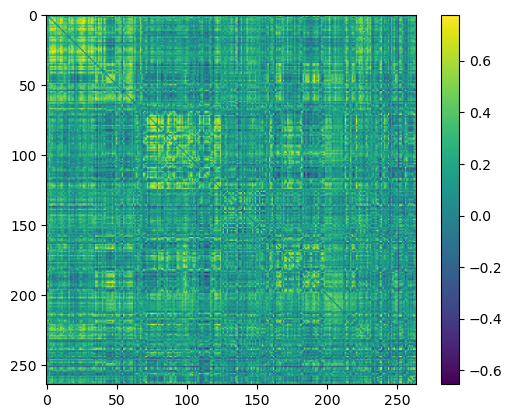

In [3]:
import matplotlib.pyplot as plt

plt.imshow(restmat[0])
plt.colorbar()
plt.show()

In [4]:
# Get summary measures

netbounds = [0, 30, 35, 49, 62, 120, 125, 156, 181, 199, 212, 221, 232, 236, 265]

def relbounds(mats, subi, r1a, r1b, r2a, r2b, sum=np.mean):
    mat = mats[subi]
    a = sum(mat[netbounds[r1a]:netbounds[r1a+1],netbounds[r1b]:netbounds[r1b+1]])
    b = sum(mat[netbounds[r2a]:netbounds[r2a+1],netbounds[r2b]:netbounds[r2b+1]])
    return a/b

def absbounds(mats, subi, r1, r2, sum=np.mean):
    mat = mats[subi]
    s = sum(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return s

def varbounds(mats, subi, r1, r2, var=np.var):
    mat = mats[subi]
    v = var(mat[netbounds[r1]:netbounds[r1+1],netbounds[r2]:netbounds[r2+1]])
    return v

def varbound(mats, subi, var=np.var):
    mat = mats[subi]
    v = var(mat)
    return v

print(absbounds(restmat, 6, 4, 4))
print(varbounds(restmat, 6, 4, 4))
print(relbounds(restmat, 6, 0, 4, 4, 4))
print(varbound(restmat, 6))

0.3844883961700917
0.10935044918143791
0.8574242880920223
0.07976432485535861


In [62]:
# Get absolute FCs for each subject-task-main diagonal network FC

abs_fcs_rest = []
abs_fcs_nback = []
abs_fcs_emoid = []

for mat, lst in zip([restmat, nbackmat, emoidmat], [abs_fcs_rest, abs_fcs_nback, abs_fcs_emoid]):
    for i in range(len(mat)):
        rr = []
        for j in range(14):
            r = absbounds(mat, i, j, j)
            rr.append(r)
        r = absbounds(mat, i, 0, 1)
        rr.append(r)
        lst.append(rr)

print('Done')

Done


In [13]:
# Get age regressor

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

agew = []
agei = []
keep = 5000

for i in range(10):
    mask = np.random.permutation(34716)[:keep]
    inpx = np.concatenate([rest[:,mask], nback[:,mask], emoid[:,mask]])
    inpy = np.concatenate([age, age, age])
    xtr, _, ytr, _ = train_test_split(inpx, inpy, train_size=300)
    
    reg = Ridge(alpha=100).fit(xtr, ytr)
    w = reg.coef_
    i = reg.intercept_

    ww = np.zeros(34716)
    ww[mask] = w
    
    agew.append(ww)
    agei.append(i)

print(agew)
print(agei)

[array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.02149427]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.        , 0.07374282,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.00249657]), array([ 0.        , -0.01005239,  0.        , ...,  0.        ,
        0.04691707,  0.00480253]), array([0.        , 0.        , 0.        , ..., 0.05341411, 0.        ,
       0.        ]), array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.01129179]), array([0.        , 0.01060498, 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([-0.04078454,  0.03265731,  0.        , ...,  0.0468631 ,
        0.        ,  0.        ])]
[13.008251329949815, 14.222332270434869, 14.143384935739304, 14.804790138329562, 14.336187511810795, 14.24136155924616, 14.471793078580099, 13.430252247119

In [14]:
# Get sex regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sexw = []
sexi = []
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    inpx = np.concatenate([rest[:,mask], nback[:,mask], emoid[:,mask]])
    inpy = np.concatenate([sex, sex, sex])
    xtr, _, ytr, _ = train_test_split(inpx, inpy, stratify=inpy, train_size=300)
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w
    
    sexw.append(ww)
    sexi.append(i)
    print(f'Done {ii}')

print(sexw)
print(sexi)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.27781666, 0.0703625 ,
       0.        ]), array([ 0.        , -0.12112769,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.25422276, 0.        , 0.        , ..., 0.26554915, 0.        ,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.35210497, 0.        ,
       0.        ]), array([0.06883552, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.])]
[1.154581236288741, -2.5496968890269565, -6.601961368162555, -0.0646128766752843, -0.027411222906401574, -5.563409796916942, -1.2706371403905052, -2.488195284426655, -4.013366215300038, -7.576622371909469]


In [15]:
# Get race regressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

racew = []
racei = []
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    inpx = np.concatenate([rest[:,mask], nback[:,mask], emoid[:,mask]])
    inpy = np.concatenate([race, race, race])
    xtr, _, ytr, _ = train_test_split(inpx, inpy, stratify=inpy, train_size=300)
    
    clf = LogisticRegression(C=100, max_iter=400).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w
    
    racew.append(ww)
    racei.append(i)
    print(f'Done {ii}')

print(racew)
print(racei)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([-0.0222357,  0.       ,  0.       , ...,  0.       ,  0.       ,
        0.       ]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.        ,  0.29226759,  0.        , ...,  0.        ,
       -0.11866205,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.        ,  0.        ,  0.        , ...,  0.12522915,
       -0.08150219, -0.02555825]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.21417493]), array([0.        , 0.        , 0.        , ..., 0.12933193, 0.13885429,
       0.        ]), array([ 0.        , -0.07857693,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([-0.05940869,  0.        ,  0.        , ...,  0.        ,
        0.06057486,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.])]
[7.157650097550572, 6.715121911618622, 5.460273768410715, 9.123442023307751, 8.002688784244599, 6.607869229049884, 7.604709231226343, 9.0014

In [16]:
# Get rest classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

restw = []
resti = []
N = 200
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    x1, _, x2, _, x3, _ = train_test_split(rest[:,mask], nback[:,mask], emoid[:,mask], train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.ones(N), np.zeros(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=600).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w

    restw.append(ww)
    resti.append(i)
    print(f'Done {ii}')

print(restw)
print(resti)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0.        , 0.        , 0.        , ..., 0.        , 0.11113886,
       0.18489648]), array([ 0.        , -0.1669509 , -0.15685552, ...,  0.        ,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.        ,  0.        ,  0.        , ..., -0.08871189,
        0.        ,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.       ,  0.       , -0.0029885, ...,  0.       ,  0.       ,
        0.       ]), array([ 0.        ,  0.        ,  0.        , ..., -0.01139284,
        0.        ,  0.        ])]
[-3.6718910671653644, -3.3121555284476427, -2.328678309811364, -1.2396543184457243, -4.256581276128563, -5.54353680105414, -5.20077373094397, -5.1063580351649955, -3.320748380170081, -3.6969577849865405]


In [17]:
# Get nback classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

nbackw = []
nbacki = []
N = 200
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    x1, _, x2, _, x3, _ = train_test_split(rest[:,mask], nback[:,mask], emoid[:,mask], train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.ones(N), np.zeros(N)])
    
    clf = LogisticRegression(C=100, max_iter=600).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w

    nbackw.append(ww)
    nbacki.append(i)
    print(f'Done {ii}')

print(nbackw)
print(nbacki)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([ 0.        , -0.13429152,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.        , -0.00777647,  0.        , ...,  0.        ,
        0.        ,  0.        ]), array([0.        , 0.        , 0.04814295, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.12930158, ..., 0.        , 0.        ,
       0.        ]), array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.33266692,  0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.        , 0.05598751,
       0.        ]), array([0.        , 0.01155704, 0.        , ..., 0.        , 0.        ,
       0.        ])]
[3.156959406355909, 1.5373822740801357, 0.9629889857314106, -1.1116641799480877, 3.8489714144660763, 0.06486873628974929, 0.11380336106168991, -1.

In [18]:
# Get emoid classifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

emoidw = []
emoidi = []
N = 200
keep = 5000

for ii in range(10):
    mask = np.random.permutation(34716)[:keep]
    x1, _, x2, _, x3, _ = train_test_split(rest[:,mask], nback[:,mask], emoid[:,mask], train_size=N)
    xtr = np.concatenate([x1, x2, x3])
    ytr = np.concatenate([np.zeros(N), np.zeros(N), np.ones(N)])
    
    clf = LogisticRegression(C=100, max_iter=600).fit(xtr, ytr)
    w = clf.coef_[0]
    i = clf.intercept_[0]

    ww = np.zeros(34716)
    ww[mask] = w

    emoidw.append(ww)
    emoidi.append(i)
    print(f'Done {ii}')

print(emoidw)
print(emoidi)

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
[array([0., 0., 0., ..., 0., 0., 0.]), array([ 0.        ,  0.        , -0.10876089, ...,  0.        ,
        0.        ,  0.        ]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.07365015]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.10164764, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.11413145, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.        , 0.27551969, ..., 0.        , 0.        ,
       0.        ]), array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -0.13980385,  0.        ]), array([ 0.25828668,  0.        ,  0.        , ...,  0.        ,
       -0.04482767,  0.        ])]
[-8.375549906791681, -5.349237876993147, -8.273703777274033, -5.364995257421627, -10.315630799548677, -7.75640673706042, -7.337961963233823, -5.51

In [63]:
import pickle

pnc_data = dict(
    age=age,
    sex=sex,
    race=race,
    abs_fcs_rest=abs_fcs_rest,
    abs_fcs_nback=abs_fcs_nback,
    abs_fcs_emoid=abs_fcs_emoid,
    agew=agew,
    agei=agei,
    sexw=sexw,
    sexi=sexi,
    racew=racew,
    racei=racei,
    restw=restw,
    resti=resti,
    nbackw=nbackw,
    nbacki=nbacki,
    emoidw=emoidw,
    emoidi=emoidi)

pickle.dump(pnc_data, open('/home/anton/Documents/Tulane/Research/Work/Imputation/pnc_data.pkl', 'wb'))

print('Done')

Done


In [218]:
import pickle

pnc_data = pickle.load(open('/home/anton/Documents/Tulane/Research/Work/Imputation/pnc_data.pkl', 'rb'))

print(len(pnc_data))

18


In [219]:
# Get similar subjects

def get_sim_subjects(age, age_tol, sex, race, data):
    res = []
    order = np.random.permutation(len(data['age']))
    for subi in order:
        a = data['age'][subi]
        s = data['sex'][subi]
        r = data['race'][subi]
        if np.abs(a-age) > age_tol or sex != s or race != r:
            continue
        res.append(subi)
        if len(res) > 10:
            break
    return res

get_sim_subjects(10, 2, 1, 1, pnc_data)

[439, 36, 220, 680, 320, 848, 862, 158, 1191, 39, 241]

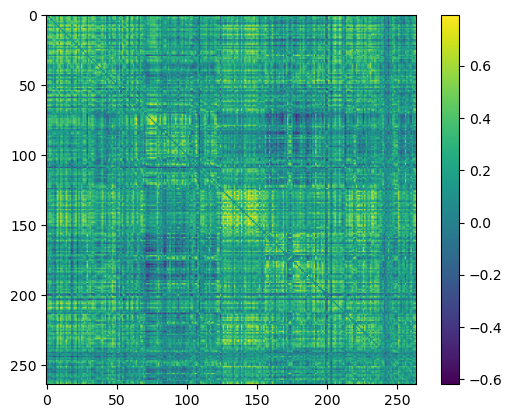

In [23]:
import matplotlib.pyplot as plt

subi = 10

plt.imshow(restmat[subi])
plt.colorbar()
plt.show()

In [220]:
def getw(data, n):
    res = []
    res += data['agew'][:n]
    res += data['sexw'][:n]
    res += data['racew'][:n]
    res += data['restw'][:n]
    res += data['nbackw'][:n]
    res += data['emoidw'][:n]
    return res

def geti(data, n):
    res = []
    res += data['agei'][:n]
    res += data['sexi'][:n]
    res += data['racei'][:n]
    res += data['resti'][:n]
    res += data['nbacki'][:n]
    res += data['emoidi'][:n]
    return res

def get_tgts(n, locs, scales):
    tgts = []
    for loc, scale in zip(locs, scales):
        tgts += list(np.random.normal(loc=loc, scale=scale, size=n))
    return tgts

geti(pnc_data, 2)

[13.008251329949815,
 14.222332270434869,
 1.154581236288741,
 -2.5496968890269565,
 7.157650097550572,
 6.715121911618622,
 -3.6718910671653644,
 -3.3121555284476427,
 3.156959406355909,
 1.5373822740801357,
 -8.375549906791681,
 -5.349237876993147]

In [239]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import itertools
import random

def rmse(a, b, mean=torch.mean):
    return mean((a-b)**2)**0.5

class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.fc1 = nn.Linear(34716, 20).float().cuda()
        self.fc2 = nn.Linear(20,1).float().cuda()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x).squeeze()
        x = torch.stack([-x, x], dim=1)
        return x

d = D()
d.load_state_dict(torch.load('/home/anton/Documents/Tulane/Research/Work/Imputation/disc7.torch'))

class FC(nn.Module):
    def __init__(self, n, reg_w, reg_i, reg_tgt,):
        super(FC, self).__init__()
        self.x = nn.Parameter(0.1*torch.randn(n,264,10).float().cuda())
        self.reg_w = [torch.from_numpy(w).float().cuda() for w in reg_w]
        self.reg_i = reg_i
        self.reg_tgt = reg_tgt

    def getfc(self, fake=None):
        if fake is None:
            x = torch.einsum('nai,nbi->nab', self.x, self.x)
        else:
            x = torch.from_numpy(fake).tile(len(self.x), 1, 1).float().cuda()
            print(x.shape)
        return x

    def getvecfc(self, x):
        a,b = torch.triu_indices(264,264,offset=1)
        return x[:,a,b]

    def getfcnp(self):
        with torch.no_grad():
            x = self.getfc()
        x = x.detach().cpu().numpy()
        m = np.max(np.abs(x))
        if m > 1:
            return x/m
        return x

    def get_prednp(self):
        res = []
        with torch.no_grad():
            x = self.getfc()
            y = self.getvecfc(x)
            for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
                r = y@w+i
                res.append(r.detach().cpu().numpy())
        return np.stack(res)

    def forward(self, ab, ab_tgts, fake_tgt, fake=None):
        x = self.getfc(fake)
        x[torch.isnan(x)] = 0.01
        y = self.getvecfc(x)
        loss = 0
        loss += torch.mean(torch.exp(torch.abs(x)**10))
        fake = d(y)
        loss += 5*rmse(fake_tgt, fake[:,1])
        for w,i,tgt in zip(self.reg_w, self.reg_i, self.reg_tgt):
            loss += 0.1*rmse(tgt, y@w+i)
        for i in range(len(x)):
            for b, tgt in zip(ab, ab_tgts):
                r1, r2 = b
                v = absbounds(x, i, r1, r2, sum=torch.mean)
                loss += rmse(v, tgt)
        return loss

fakemats = []
errs = []

for subi in range(1):
    a = 20
    s = 5
    r = -5
    ss = 1
    rr = 0
        
    fc = FC(5, getw(pnc_data, nreg), geti(pnc_data, nreg), get_tgts(nreg, [a, s, r, -10, 10, -10], [3, 3, 3, 5, 5, 5]))
    optim = torch.optim.Adam(fc.parameters(), lr=5e-3)
    
    nepochs = 600
    pperiod = 50

    subs = get_sim_subjects(a, 3, ss, rr, pnc_data)
    ab = []
    for i in range(14):
        ab.append((i,i))
    ab.append((0,1))
    ab_tgts = pnc_data['abs_fcs_rest'][subs[0]]

    fake_tgt = -1
    
    for e in range(nepochs):
        optim.zero_grad()
        loss = fc(ab, ab_tgts, fake_tgt)
        loss.backward()
        optim.step()
        if e % pperiod == 0 or e == nepochs-1:
            print(f'{e} {loss}')

    print('Done')

0 66.6611557006836
50 29.9617977142334
100 15.61001205444336
150 10.75408935546875
200 9.130488395690918
250 7.999461650848389
300 7.232564926147461
350 6.532716751098633
400 6.088794708251953
450 23.268583297729492
500 23.03175926208496
550 22.992280960083008
599 22.989309310913086
Done


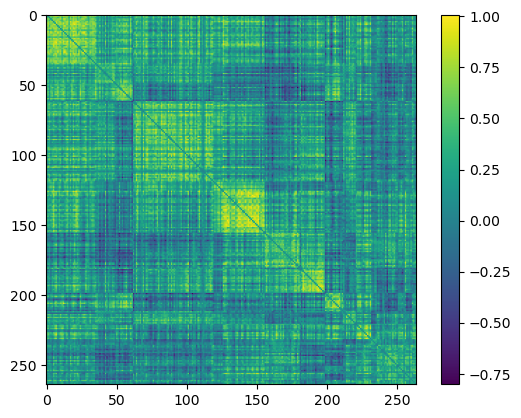

In [244]:
import matplotlib.pyplot as plt

one_minus_eye = np.ones((264,264))-np.eye(264)

plt.imshow(fc.getfcnp()[4]*one_minus_eye)
# plt.imshow(emoidmat[6])
plt.colorbar()
plt.show()

In [210]:
diff = nback-rest

subi = 6

avgdiff = np.mean(diff, axis=0)
err = rmse(rest[subi]+avgdiff, nback[subi], mean=np.mean)
print(err)

min_err = 1
for i in range(50):
    if i == subi:
        continue
    err = rmse(rest[subi]+diff[i], nback[subi], mean=np.mean)
    if err < min_err:
        min_err = err

print(min_err)

0.4162018030462131
0.34319300245251944


In [216]:
rmse(rest, nback, mean=np.mean)

0.2444221946705443